In [1]:
import numpy as np
import healpy as hp
import mm_constrained_realizations as mmcr
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import planck_colormap
cm = planck_colormap.colormap()

In [5]:
### set up - params
nside = 64
lmax = 3*nside//2
fwhm = (160/60)*np.pi/180
### importing maps
weights_map = hp.read_map('Commander-Ruler/input_files/full_weights_map_08_0064.fits')
cl = np.load('Commander-Ruler/input_files/cls_PlanckPR2_TT_lowp_lensing_lensed.npy')
tmap = hp.read_map('Commander-Ruler/input_files/commander_t_map.fits')
noise_cov = hp.read_map('Commander-Ruler/input_files/commander_noise_cov.fits')
mask = hp.read_map('Commander-Ruler/input_files/commander_mask.fits')
### IMPORTANT ####
# as seen in prepping input files notebook
# bl is 1 for every ell at this scale so we wont smooth

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [9]:
### initializing CR
cr = mmcr.ConstrainedRealizations(nside,weights_map,mask=mask)

In [27]:
# setting covariances
cr.set_signal_cov(cl,fwhm)
cr.set_noise_cov(noise_cov)

In [40]:
# calculating one delta for convergence study
delta = cr.gen_delta()

In [130]:
# cooling schedule params to vary over
lamb_0_list = [1e4,1e8]
tp_list = [1e-6,1e-8]

In [131]:
cl_list = []
for lamb_0 in lamb_0_list:
    for tp in tp_list:
        cr.set_cooling_schedule(lamb_0,tp)
        flm = cr.gen_constrained_realization(delta_fix=delta)
        cl_cr = hp.alm2cl(flm,lmax=cr.params.lmax)
        cl_list.append([cl_cr,"{}; {}".format(np.log10(lamb_0),np.log10(tp))])

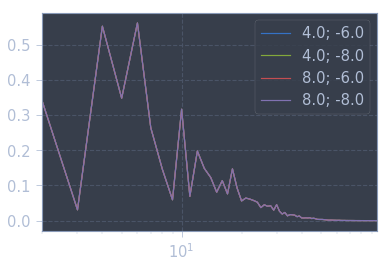

In [132]:
for item in cl_list:
    plt.plot(item[0],label=item[1])

plt.xscale('log')
plt.xlim(2,cr.params.lmax)
plt.legend(loc='upper right')
plt.show()

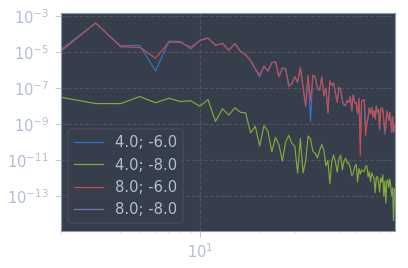

In [133]:
for i in range(len(cl_list)):
    plt.plot(np.abs(cl_list[i][0] - cl_list[-1][0])/cl_list[-1][0],label=cl_list[i][1])

plt.xscale('log')
plt.yscale('log')
plt.xlim(2,cr.params.lmax)
plt.legend(loc='lower left')
plt.show()

### Conclustions
For this specific case it seems that lamb_0 doesn't matter much, so I will set it to 1e4.
Target precision drives the precision much more. So I will set it to 1e-8.